# 05. Machine Learning

The target on this notebook is to build different models using machine learning to see whicj one is the better model for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import feature_selection

In [2]:
df = pd.read_csv('/users/alfon/Desktop/Master/TFM/CSV/04.cars_features_def.csv')
df.head()

,Year,Kms,Hp,Fuel_cons,Doors,Gear_type_Automatic,Gear_type_Manual,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Electric,...,Type_small,Type_suv,Type_van,Seller_Dealer,Seller_Private,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
0,2006,182510,68,4.4,5,0,1,0,1,0,...,1,0,0,1,0,10412.196983,8547.619048,15207.210252,22252.941248,2400
1,2017,67478,125,4.9,5,0,1,0,0,0,...,1,0,0,1,0,25546.556757,16731.591241,15207.210252,22252.941248,14990
2,2007,31510,98,6.6,5,0,1,0,0,0,...,1,0,0,1,0,11099.399408,9136.680000,15207.210252,22252.941248,4950
3,2017,34985,92,0.0,5,1,0,0,0,1,...,1,0,0,1,0,11099.399408,10966.931096,15207.210252,22252.941248,10830
4,2006,83700,174,6.2,5,0,1,0,0,0,...,1,0,0,1,0,17251.958184,19240.750000,15207.210252,22252.941248,9800


Definig the features (X) and the target (y)

In [3]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [4]:
X.shape, y.shape

((28521, 28), (28521,))

Text(0.5, 1.0, 'Price vs Year')

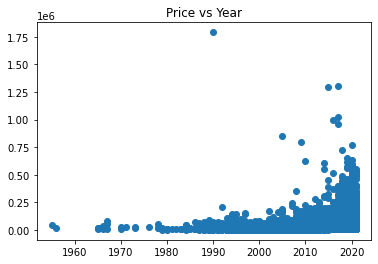

In [5]:
fig, ax = plt.subplots(1,1)
ax.scatter(X[:, 0], y)
plt.title("Price vs Year")

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)


/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_33341/3648555921.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)


,Year,Kms,Hp,Fuel_cons,Doors,Gear_type_Automatic,Gear_type_Manual,Fuel_type_CNG,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_LPG,Fuel_type_Petrol,Type_cabrio,Type_coupe,Type_familiar,Type_minivan,Type_other,Type_sedan,Type_small,Type_suv,Type_van,Seller_Dealer,Seller_Private,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
Year,1.00,-0.63,0.05,-0.45,0.12,0.19,-0.19,0.03,0.03,0.09,0.10,-0.02,-0.08,-0.10,-0.06,0.05,0.02,-0.04,-0.15,0.11,0.12,-0.03,0.39,-0.39,-0.01,0.12,0.07,0.07,0.22
Kms,-0.63,1.00,-0.13,0.17,0.08,-0.14,0.14,-0.03,0.28,-0.10,-0.09,0.01,-0.24,-0.05,-0.05,0.09,0.04,0.01,0.14,-0.14,-0.06,0.09,-0.37,0.37,-0.12,-0.20,-0.06,-0.06,-0.29
Hp,0.05,-0.13,1.00,0.62,-0.41,0.47,-0.47,-0.03,-0.26,0.04,0.05,0.00,0.24,0.11,0.41,-0.07,-0.16,0.00,-0.01,-0.23,-0.01,-0.06,-0.05,0.05,0.66,0.73,0.09,0.18,0.69
Fuel_cons,-0.45,0.17,0.62,1.00,-0.35,0.17,-0.17,-0.01,-0.37,-0.21,-0.13,0.02,0.46,0.15,0.30,-0.12,-0.11,0.02,-0.03,-0.22,0.04,0.04,-0.24,0.24,0.47,0.43,0.03,0.07,0.34
Doors,0.12,0.08,-0.41,-0.35,1.00,-0.20,0.20,0.03,0.25,0.02,0.04,-0.00,-0.28,-0.59,-0.73,0.20,0.20,0.02,0.25,0.21,0.26,0.06,0.03,-0.03,-0.31,-0.32,-0.07,-0.06,-0.28
Gear_type_Automatic,0.19,-0.14,0.47,0.17,-0.20,1.00,-1.00,-0.02,-0.03,0.10,0.17,0.01,-0.04,0.07,0.19,-0.04,-0.10,-0.01,-0.00,-0.16,0.07,-0.08,0.03,-0.03,0.26,0.29,0.04,0.12,0.28
Gear_type_Manual,-0.19,0.14,-0.47,-0.17,0.20,-1.00,1.00,0.02,0.03,-0.10,-0.17,-0.01,0.04,-0.07,-0.19,0.04,0.10,0.01,0.00,0.16,-0.07,0.08,-0.03,0.03,-0.26,-0.29,-0.04,-0.12,-0.28
Fuel_type_CNG,0.03,-0.03,-0.03,-0.01,0.03,-0.02,0.02,1.00,-0.06,-0.00,-0.01,-0.00,-0.05,-0.02,-0.02,-0.01,-0.01,-0.00,0.01,0.02,0.02,-0.01,0.03,-0.03,-0.02,-0.01,-0.02,-0.01,-0.01
Fuel_type_Diesel,0.03,0.28,-0.26,-0.37,0.25,-0.03,0.03,-0.06,1.00,-0.09,-0.18,-0.02,-0.93,-0.18,-0.16,0.16,0.15,0.00,0.01,-0.12,0.07,0.10,-0.05,0.05,-0.16,-0.17,-0.06,-0.03,-0.17
Fuel_type_Electric,0.09,-0.10,0.04,-0.21,0.02,0.10,-0.10,-0.00,-0.09,1.00,-0.01,-0.00,-0.07,0.01,-0.03,-0.03,0.01,-0.00,0.00,0.06,-0.01,-0.01,0.05,-0.05,0.01,0.03,0.02,0.03,0.04


In [7]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .2)

## Models

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
lr.coef_

array([ 3.61279235e+02, -5.69372534e-02,  1.12644338e+02, -9.69905640e+02,
        1.06728089e+03, -1.61987173e+03,  1.61987173e+03,  2.11183199e+03,
        2.60366363e+03, -6.53050308e+03,  3.08973684e+02, -2.34258840e+02,
        1.74029262e+03,  2.52530620e+03, -3.05894664e+03, -1.44576534e+03,
       -2.08451968e+02,  1.76261942e+03, -2.34155789e+03, -1.18228854e+03,
       -2.23658361e+03,  6.18566837e+03,  6.60123390e+02, -6.60123390e+02,
        1.28360693e-01,  6.75669920e-01,  1.30961924e-01,  1.18941662e-01])

In [13]:
y_pred = lr.predict(X_test)

In [14]:
y_pred[:10]

array([ 89419.41357033,  18567.09781517,  13025.2663451 ,  19570.9538748 ,
        10797.93833356,   7608.20559642,  -2942.48518506,  20744.33144025,
       342845.99570575,  20431.26238703])

In [15]:
y_test

array([113659,  25800,   5900, ...,   7190,  24800,  10900])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 7.000e+00, 1.600e+01, 2.640e+02, 5.381e+03,
        2.600e+01, 4.000e+00]),
 array([-1179075.87691274, -1110355.25596285, -1041634.63501297,
         -972914.01406309,  -904193.3931132 ,  -835472.77216332,
         -766752.15121343,  -698031.53026355,  -629310.90931367,
         -560590.28836378,  -491869.6674139 ,  -423149.04646402,
         -354428.42551413,  -285707.80456425,  -216987.18361436,
         -148266.56266448,   -79545.9417146 ,   -10825.32076471,
           57895.30018517,   126615.92113506,   195336.54208494]),
 <BarContainer object of 20 artists>)

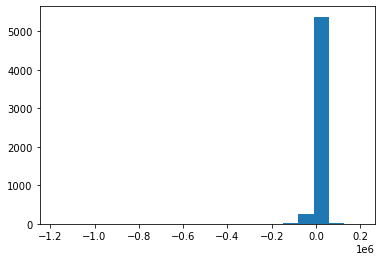

In [16]:
fig, ax = plt.subplots(1,1)
ax.hist(y_pred - y_test, bins=20)

In [17]:
from sklearn import metrics
print('R2 test:', lr.score(X_test, y_test))
print('R2 train:', lr.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 test: 0.6760561512201313
R2 train: 0.7398180929569714
Mean Absolute Error: 7189.9673581334255
Mean Percentage Absolute Error: 0.5237575339483885
Mean Squared Error: 767446462.3835225
Root Mean Squared Error: 27702.82408678802


### Having a look to the features selection

In [18]:
rfe = feature_selection.RFE(estimator=lr, n_features_to_select=1, step=1)

In [19]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [20]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

The best feature to select aacording to the rfe is the feature Coupe_category by removing features

In [21]:
rfe.ranking_

array([17, 28, 22,  8, 23,  2, 21,  9, 20,  6,  7,  3, 16,  4,  1, 14, 10,
       13, 19, 11, 15, 12,  5, 18, 25, 24, 26, 27])

In [22]:
scores_rfe = []
for i in range(1,X_train.shape[1] + 1):
    lr = LinearRegression()
    rfe = feature_selection.RFE(estimator=lr,n_features_to_select=i,step=1)
    rfe.fit(X_train, y_train)
    lr.fit(X_train[:,rfe.support_], y_train)
    scores_rfe.append(lr.score(X_test[:,rfe.support_],y_test))

In [23]:
scores_rfe

[0.06507892014909566,
 0.10901928037891184,
 0.10904980464876968,
 0.11901577106598815,
 0.12799749924915416,
 0.1284456794515263,
 0.1278190226181325,
 0.18750835316355863,
 0.187489266787645,
 0.18789133360056476,
 0.1883316497986508,
 0.18837954137294333,
 0.18840324448195012,
 0.18855789205291795,
 0.18856909722425885,
 0.18862720631224528,
 0.28991922964032457,
 0.28991922964032446,
 0.28991922964032457,
 0.2899192296403249,
 0.2899192296403237,
 0.4731134740344519,
 0.47311347403445236,
 0.6777251404964177,
 0.6723099160026031,
 0.6720165730606436,
 0.6723239497005654,
 0.6760561512201448]

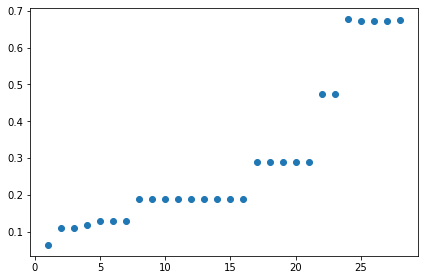

In [24]:
fig, ax = plt.subplots(1,1)
ax.scatter(range(1, X_train.shape[1] + 1),scores_rfe)
plt.tight_layout()

In [25]:
lr = LinearRegression()
sfs = feature_selection.SequentialFeatureSelector(estimator=lr,n_features_to_select=1,direction="forward")
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=1)

In [26]:
sfs.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [27]:
scores_sfs = []
for i in range(1,X_train.shape[1]):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(estimator=lr,n_features_to_select=i,direction="forward")
    sfs.fit(X_train, y_train)
    lr.fit(X_train[:,sfs.support_], y_train)
    scores_sfs.append(lr.score(X_test[:,sfs.support_],y_test))

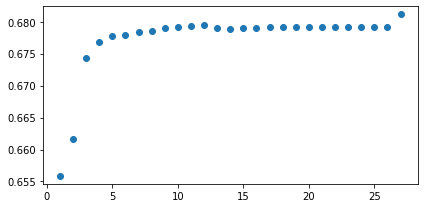

In [28]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.scatter(range(1, X_train.shape[1]),scores_sfs)
plt.tight_layout()

In [29]:
scores_sfs_b = []
for i in range(1,X_train.shape[1]):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(estimator=lr,n_features_to_select=i,direction="backward")
    sfs.fit(X_train, y_train)
    lr.fit(X_train[:,sfs.support_], y_train)
    scores_sfs_b.append(lr.score(X_test[:,sfs.support_],y_test))

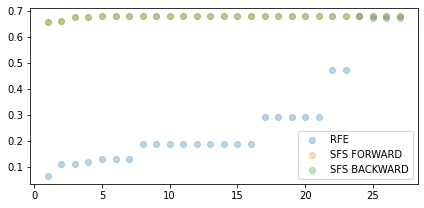

In [30]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.scatter(range(1, X_train.shape[1]),scores_rfe[:-1], label="RFE", alpha = .3)
ax.scatter(range(1, X_train.shape[1]),scores_sfs, label = "SFS FORWARD", alpha = .3)
ax.scatter(range(1, X_train.shape[1]),scores_sfs_b, label = "SFS BACKWARD", alpha = .3)
ax .legend()
plt.tight_layout()

In [31]:
feature_names = df[df.columns[:-1]].columns.tolist()


In [32]:
for i in range (1,6):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(estimator=lr, n_features_to_select=i, direction="forward")
    sfs.fit(X_train, y_train)
    print([sfs.support_])

[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])]
[array([ True,  True,  True, False, False,  True, False, False, False,
       False, False, 

If the model had to select only :

- 1 feature: it would take Model
- 2 features: it would take Model and Kms
- 3 features: it would take Model, Kms and Hp
- 4 features: it would take Model, Kms, Hp and Fuel_cons
- 5 features: it would take Model, Kms, Hp, Year and Gear_type_Automatic


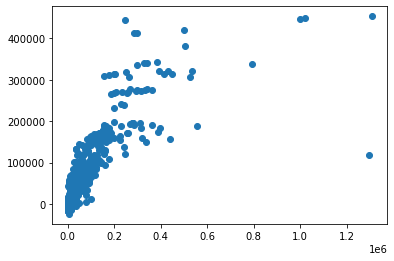

In [33]:
plt.scatter(y_test, y_pred)

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [36]:
y_pred = rf.predict(X_test)

In [37]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,113659,119086.09
1,25800,25966.58
2,5900,6871.93
3,15690,17584.54
4,9990,9976.75
...,...,...
5700,6950,6950.00
5701,3275,3047.65
5702,7190,7190.00
5703,24800,25166.90


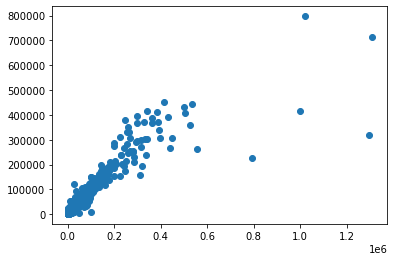

In [38]:
plt.scatter(y_test, y_pred)

In [39]:
from sklearn import metrics
print('R2 test:', rf.score(X_test, y_test))
print('R2 train:', rf.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2 test: 0.8132136419326451
R2 train: 0.9754401282164182
Mean Absolute Error: 3111.1876706297985
Mean Percentage Absolute Error: 0.1441973356772703
Mean Squared Error: 442510423.5200459
Root Mean Squared Error: 21035.931724552775


### Decission Tree regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
y_pred = dtr.predict(X_test)

In [43]:
print('R2 test:', dtr.score(X_test, y_test))
print('R2 train:', dtr.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



R2 test: 0.7707086614575531
R2 train: 0.9999751195811036
Mean Absolute Error: 3769.5054338299738
Mean Percentage Absolute Error: 0.1772134991175688
Mean Squared Error: 543207803.70539
Root Mean Squared Error: 23306.818824228027


### Support Vector Regression

In [47]:
from sklearn.svm import SVR

In [51]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [52]:
y_pred = svr.predict(X_test)

In [53]:
print('R2 test:', svr.score(X_test, y_test))
print('R2 train:', svr.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Percentage Absolute Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 test: -0.01833908038879195
R2 train: -0.02581940555318063
Mean Absolute Error: 13816.502298473863
Mean Percentage Absolute Error: 0.7839828721749572
Mean Squared Error: 2412519106.9219494
Root Mean Squared Error: 49117.40126393038
